In [8]:
from danlp.models import load_bert_base_model
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from tqdm import tqdm

danish_bert = load_bert_base_model()


tokenizer = danish_bert.tokenizer


Some weights of the model checkpoint at C:\Users\rune7\.danlp\bert.botxo.pytorch were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
def count_paragraph_lengths(folder_path):
    paragraph_lengths = []

    for file in tqdm(os.listdir(folder_path), total = len(os.listdir(folder_path)), desc="Counting paragraph lengths"):
        if file.endswith(".txt"):
            with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
                paragraphs = f.read().split("\n")
                for paragraph in paragraphs:
                    tokens = tokenizer.tokenize(paragraph)
                    paragraph_lengths.append(len(tokens))

    return paragraph_lengths

def plot_distribution(paragraph_lengths):
    plt.hist(paragraph_lengths, bins='auto', alpha=0.7, color="blue")
    plt.xlabel("Paragraph Length (tokens)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Paragraph Lengths")
    plt.show()


Counting paragraph lengths: 100%|██████████| 36650/36650 [09:47<00:00, 62.35it/s]  


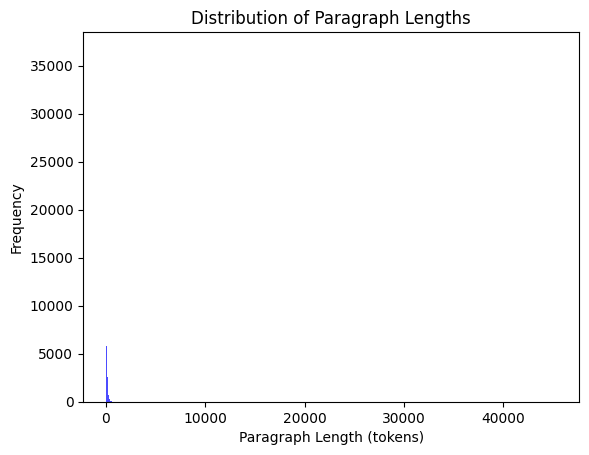

In [17]:
folder_path = "../data/subset_paragraphs"
paragraph_lengths = count_paragraph_lengths(folder_path)
plot_distribution(paragraph_lengths)

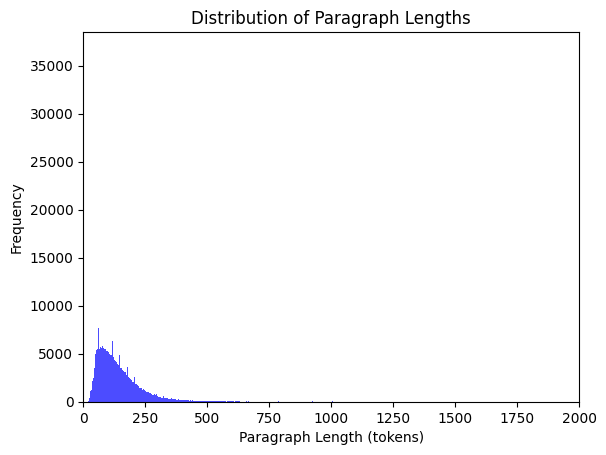

In [20]:
plt.hist(paragraph_lengths, bins='auto', alpha=0.7, color="blue")
plt.xlim(0, 2000)
plt.xlabel("Paragraph Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Paragraph Lengths")
plt.show()


In [18]:
#get facts about the distribution
print("Mean: ", np.mean(paragraph_lengths))
print("Median: ", np.median(paragraph_lengths))
print("Standard Deviation: ", np.std(paragraph_lengths))
print("Max: ", np.max(paragraph_lengths))
print("Min: ", np.min(paragraph_lengths))


Mean:  131.16114754549037
Median:  110.0
Standard Deviation:  142.23566945872855
Max:  45360
Min:  0


In [21]:
#count number of paragraphs longer than 1000 tokens
count = 0
for length in paragraph_lengths:
    if length > 10000:
        count += 1
print("Number of paragraphs longer than 10000 tokens: ", count)

Number of paragraphs longer than 10000 tokens:  2
